<a href="https://colab.research.google.com/github/pragmatic-philosopher09/Audio-Emotion-Analyzer-Through-Deep-Learning/blob/main/Phase_4_LSTM_Model_Concoction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import sys
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


import keras
#from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Features = pd.read_csv('/content/drive/MyDrive/features_dataset.csv')
Features.head()
# Features.shape


Mounted at /content/drive


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,152,153,154,155,156,157,158,159,160,labels
0,0,0.272267,0.689451,0.708028,0.666473,0.715468,0.694820,0.627661,0.632560,0.687715,...,0.000687,0.000502,0.000372,0.000197,0.000137,0.000288,0.000349,0.000143,1.498768e-05,angry
1,1,0.262035,0.603476,0.668302,0.692199,0.709884,0.658301,0.605176,0.609343,0.640842,...,0.000009,0.000012,0.000028,0.000034,0.000036,0.000035,0.000032,0.000011,8.432723e-07,calm
2,2,0.195466,0.628032,0.687169,0.651985,0.621273,0.604192,0.640623,0.626136,0.652430,...,0.000086,0.000107,0.000061,0.000052,0.000059,0.000095,0.000090,0.000031,2.326331e-06,sad
3,3,0.173769,0.720864,0.685492,0.655122,0.652557,0.587786,0.550012,0.638170,0.707171,...,0.000064,0.000051,0.000074,0.000129,0.000198,0.000243,0.000190,0.000074,4.691918e-06,fear
4,4,0.207284,0.692981,0.737456,0.726056,0.685032,0.636497,0.568223,0.528898,0.598124,...,0.000018,0.000014,0.000014,0.000005,0.000007,0.000011,0.000016,0.000008,4.218449e-07,sad


In [ ]:
from sklearn.utils import shuffle
temp = shuffle(Features)
# temp[:10]


df = np.random.rand(len(temp)) < 0.8
train = temp[df]
test = temp[~df] # 1 - train basically


trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]


from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(X_train, axis=2)
x_test = np.expand_dims(X_test, axis=2)


In [ ]:
print('Train dimension:')
print(x_train.shape)
print('Test dimension:')
print(x_test.shape)

print('Train labels dimension:')
print(y_train.shape)
print('Test labels dimension:')
print(y_test.shape)


Train dimension:
(1141, 162, 1)
Test dimension:
(299, 162, 1)
Train labels dimension:
(1141, 8)
Test labels dimension:
(299, 8)


In [ ]:
# LSTM Classifier
import keras
from keras.models import Sequential
from keras.layers import *
from keras.regularizers import l2, l1, l1_l2

from tensorflow.keras import layers,regularizers,models
from tensorflow import keras


In [ ]:
model = Sequential()
model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(256, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))

model.add(LSTM(64, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))

model.add(LSTM(64, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Flatten())

# model.add(Dense(32))
# model.add(Dropout(0.4))
# model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('softmax'))


# model = Sequential()
# model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(256, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(32, return_sequences=True))
# model.add(BatchNormalization())
# model.add(Flatten())

# model.add(Dense(32))
# model.add(Activation('relu'))

# model.add(Dense(8))
# model.add(Activation('softmax'))


# model = models.Sequential([
#         layers.BatchNormalization(input_shape=(x_train.shape[1], 1)),
#         layers.LSTM(256,dropout=0.2,recurrent_dropout=0.2,activation=None,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(128,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,activation=None,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.BatchNormalization(),

#         layers.Flatten(),
#         layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
#         layers.Dropout(0.2),
#         layers.BatchNormalization(),
#         layers.Dense(8,activation='softmax'),
# ])

#opt = keras.optimizers.Adam(learning_rate=0.00001)
# Configures the model for training
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'],callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 162, 1)           4         
 hNormalization)                                                 
                                                                 
 lstm_9 (LSTM)               (None, 162, 256)          264192    
                                                                 
 lstm_10 (LSTM)              (None, 162, 64)           82176     
                                                                 
 lstm_11 (LSTM)              (None, 162, 64)           33024     
                                                                 
 batch_normalization_7 (Batc  (None, 162, 64)          256       
 hNormalization)                                                 
                                                                 
 flatten_3 (Flatten)         (None, 10368)            

In [ ]:
# Training the model
history=model.fit(x_train, y_train, batch_size=64, epochs=1000, validation_data=(x_test, y_test), shuffle=True)


Epoch 1/1000
18/18 [==============================] - 1s 46ms/step - loss: 0.2924 - accuracy: 0.9316 - val_loss: 5.0368 - val_accuracy: 0.4649
Epoch 2/1000
18/18 [==============================] - 1s 32ms/step - loss: 3.3519 - accuracy: 0.5767 - val_loss: 7.5990 - val_accuracy: 0.3177
Epoch 3/1000
18/18 [==============================] - 1s 30ms/step - loss: 2.9799 - accuracy: 0.4733 - val_loss: 13.0597 - val_accuracy: 0.2709
Epoch 4/1000
18/18 [==============================] - 1s 28ms/step - loss: 1.9036 - accuracy: 0.4961 - val_loss: 11.0302 - val_accuracy: 0.2040
Epoch 5/1000
18/18 [==============================] - 1s 29ms/step - loss: 1.4035 - accuracy: 0.5600 - val_loss: 4.6679 - val_accuracy: 0.3645
Epoch 6/1000
18/18 [==============================] - 1s 29ms/step - loss: 1.1568 - accuracy: 0.6293 - val_loss: 4.6818 - val_accuracy: 0.3645
Epoch 7/1000
18/18 [==============================] - 1s 29ms/step - loss: 1.0222 - accuracy: 0.6459 - val_loss: 4.4703 - val_accuracy: 0.36

10/10 [==============================] - 0s 19ms/step - loss: 2.8366 - accuracy: 0.6455
Accuracy of our model on test data :  64.54849243164062 %


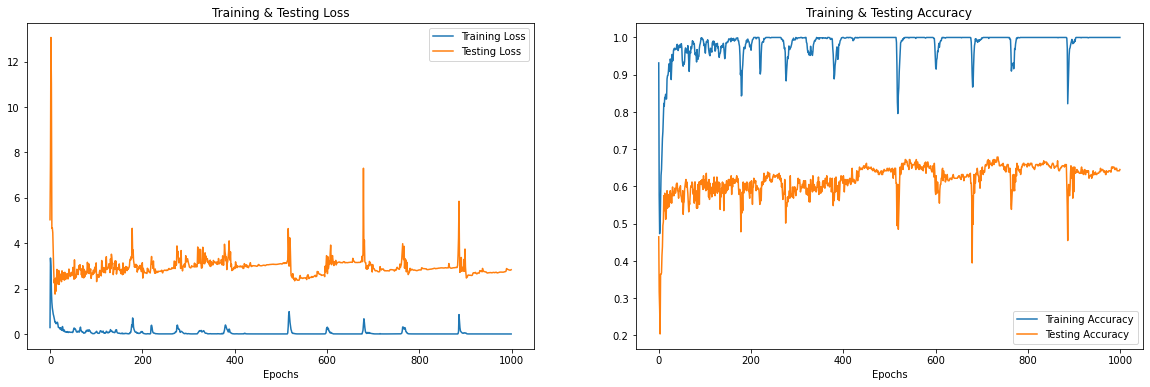

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(1000)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
model.save('LSTM.h5')